In [42]:
import torch
import torch.nn as nn
# simple feedforward neural network using nn.sequential

sample_model = nn.Sequential(
    nn.Linear(in_features=10, out_features=5), # first layer that transforms input from 10 features into 5
    nn.ReLU(), # activation function that adds nonlinearity  to the model
    nn.Linear(in_features=5, out_features=1) # produces a single output value
)


# custom class using nn.sequential
class CustomRegressionModel(nn.Module):
    def __init__(self):
        super(CustomRegressionModel, self).__init__()

        self.network = nn.Sequential(
            nn.Linear(in_features=10, out_features=5),
            nn.ReLU(),
            nn.Linear(in_features=5, out_features=1)
        )

    def forward(self, x): # forward propagation
        return self.network(x)


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# task: use a regression model to learn the relationship between input x and output y following a linear or slightly non-lineared trend

# a simple feedforward neural network for regression
# input layer: raw input, hidden layer: introduces non-linearity and allows the model to captrue comlex relationship
# output layer: produces a single continuous value as the prediction
# implementation: use nn.Sequential to stack layers in linear and orderly fashion


# loss functions and optimization
# loss function: Mean Squared Error or MSE to measure the average squared difference between predicted values and actual values
#optimizer: stoachastic gradient descent which is used to iteratively update the weights to minimize the loss
# backpropagation: computes the gradients so that each weight is adjusted in proportion to its contribution to the error


# training loop:
# iterative process: forward propagation that pass the input data through model to obtain predictions
# loss calculation: compares predictions to true values using MSE loss function
# backpropagation: compute the gradients of the loss with respect to each parameter
# adjust the model's weight using optimizer
# goal: minimize overall cost and ensure that the model learns the underlying relationships


In [45]:
# random data to test the implementation
np.random.seed(32)
torch.manual_seed(32)

# generate 100 data points in the range of [-10, 10]
X_np = np.linspace(-10, 10, 100).reshape(-1, 1) # converts the data into 1 column, (100, 1) in this case
y_np = 2 * X_np + 3 + np.random.normal(0, 2, X_np.shape) # create a linear relationship and add variation by making the mean to be 0 and standard deviation of 2 and using the same shape of X

# convert the numpy arrays to pytorch tensors
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

In [46]:
# nn.Sequential to define a simple feedforward neural network for regression
model_seq = nn.Sequential(
    nn.Linear(in_features=1, out_features=10), # uses data with the shape of (x, 1) where x could be any natural number
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1)
)
# MSE to quantify the difference between predictions and true values
loss_function = nn.MSELoss()

# SGD for optimizer
optimizer = optim.SGD(model_seq.parameters(), lr=0.01) # model_seq.parameters() is used to take the registered parameters of model_seq

num_epochs = 200 # number of training loops
losses = [] # captrue the loss values computed during training

for epoch in range(num_epochs):
    # forward propgation that passes input data through the model to get predictions
    outputs = model_seq(X)
    loss = loss_function(outputs, y) # compute the loss
    losses.append(loss.item()) # append the loss for tracking


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # compute new gradients
    optimizer.step() # update parameters using gradient descent


# set the model to evaluation mode
model_seq.eval()

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

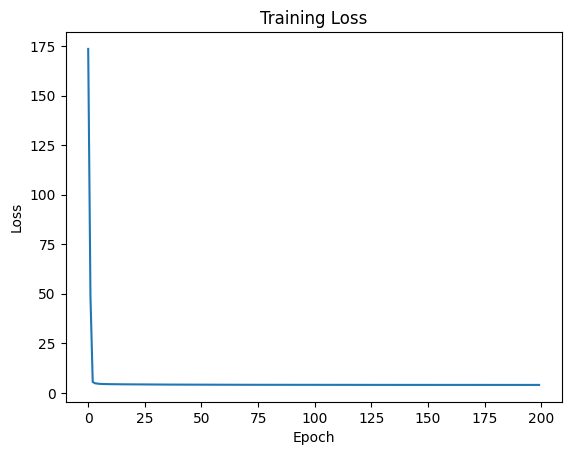

In [47]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [48]:
# testing the model
test_input = torch.tensor([[6.0]])
with torch.no_grad():
    predicted_outcomes = model_seq(test_input)
print(predicted_outcomes.item())

15.061568260192871
